ADIDAS vs NIKE



In [1]:
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Get data with daily frequency (01.01.2020 - 20.10.2022)

In [24]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# define the tickers symbol
tickerSymbol_ADS = 'ADS.DE'
tickerSymbol_NKE = 'NKE.DE'

# get data on this ticker
tickerData = yf.Ticker(tickerSymbol_ADS)
tickerData = yf.Ticker(tickerSymbol_NKE)

# get the historical prices for those two tickers
df = tickerData.history(period='1d', start='2020-1-1', end='2022-10-20')
df = yf.download([tickerSymbol_ADS,tickerSymbol_NKE], period='1d', start='2020-1-1', end='2022-10-20', 
                 group_by='ticker')
df.head()

#see your data
df

[*********************100%***********************]  2 of 2 completed


ADS.DE                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2020-01-02  289.200012  293.250000  289.200012  291.549988  277.637939   
2020-01-03  290.000000  292.250000  288.350006  291.950012  278.018890   
2020-01-06  288.950012  290.649994  285.149994  289.649994  275.828613   
2020-01-07  290.549988  296.500000  290.500000  294.750000  280.685242   
2020-01-08  294.000000  302.850006  293.500000  302.850006  288.398743   
...                ...         ...         ...         ...         ...   
2022-10-13  109.900002  114.739998  107.459999  113.120003  113.120003   
2022-10-14  115.680000  116.339996  111.739998  114.120003  114.120003   
2022-10-17  114.300003  119.059998  112.360001  118.180000  118.180000   
2022-10-18  120.320000  121.300003  118.279999  118.279999  118.279999   
2022-10-19  118.900002  118.900002  114.620003  115.680000  115.680000   

                       NKE.DE                                              \
            Volume       Open       High        Low      Close  Adj Close   
Date                                                                        
2020-01-02  429314  90.800003  91.120003  90.419998  90.540001  88.060555   
2020-01-03  440067  91.230003  91.230003  90.379997  91.010002  88.517700   
2020-01-06  494435  91.190002  91.190002  90.000000  90.720001  88.235619   
2020-01-07  489629  91.190002  92.230003  91.040001  91.959999  89.441681   
2020-01-08  686646  91.300003  91.779999  90.500000  91.449997  88.945625   
...            ...        ...        ...        ...        ...        ...   
2022-10-13  970729  92.120003  92.300003  89.199997  90.699997  90.699997   
2022-10-14  716323  91.709999  93.029999  90.769997  90.959999  90.959999   
2022-10-17  611802  90.559998  91.919998  89.919998  91.540001  91.540001   
2022-10-18  517632  93.300003  93.900002  91.500000  91.540001  91.540001   
2022-10-19  441897  91.750000  91.949997  90.199997  90.940002  90.940002   

                   
           Volume  
Date               
2020-01-02   7693  
2020-01-03   5818  
2020-01-06   2942  
2020-01-07   3573  
2020-01-08   7367  
...           ...  
2022-10-13  12274  
2022-10-14    973  
2022-10-17   4453  
2022-10-18   3077  
2022-10-19   2078  

[715 rows x 12 columns]

1. Graphs

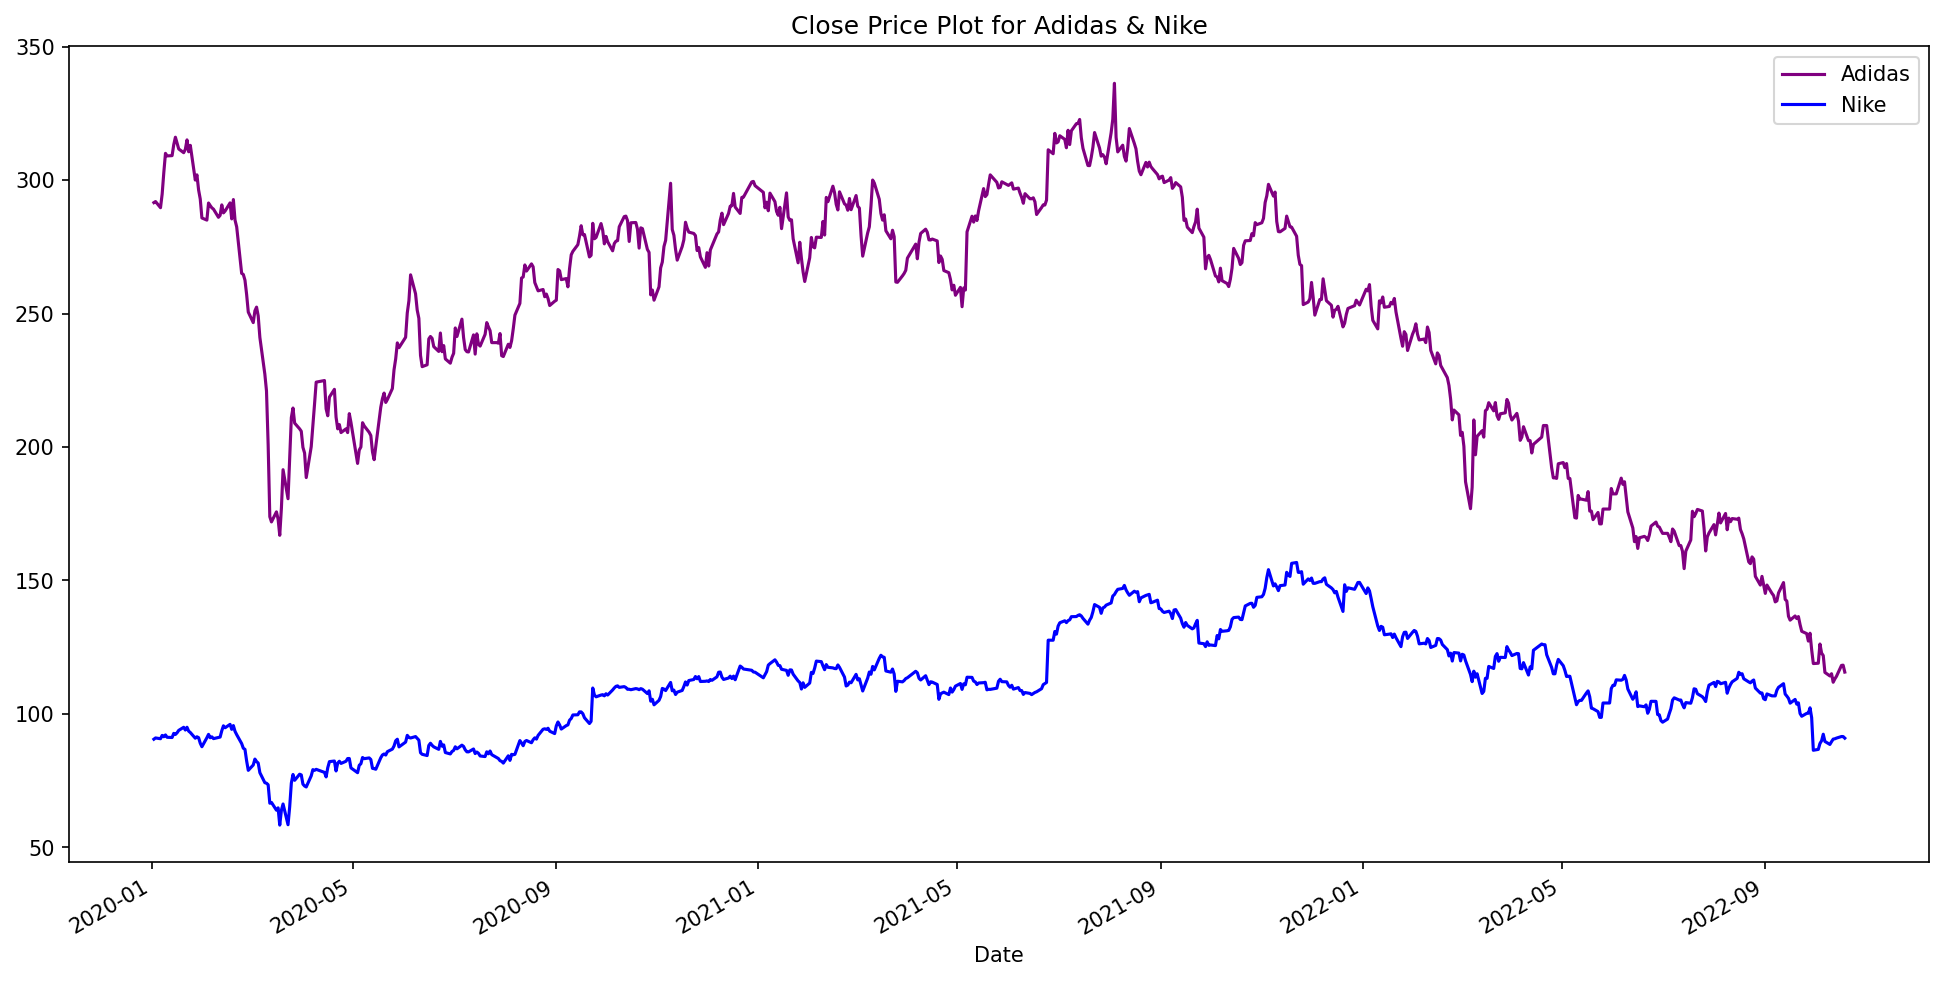

In [25]:
# Visualizing The Close Price of all the stocks
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

df["ADS.DE"]["Close"].plot(label='Adidas', color = 'PURPLE')
df["NKE.DE"]["Close"].plot(label='Nike', color='BLUE')

# adding title to the plot
plt.title('Close Price Plot for Adidas & Nike')
# adding Label to the x-axis
plt.xlabel('Date')
# adding legend to the curve
plt.legend()

In [26]:
#ADIDAS
close_ADS = df["ADS.DE"]["Close"]
simple_return_ADS = close_ADS.pct_change()
log_return_ADS = np.log(1+simple_return_ADS)

# NIKE
close_NKE = df["NKE.DE"]["Close"]
simple_return_NKE = close_NKE.pct_change()
log_return_NKE = np.log(1+simple_return_NKE)


Populating the interactive namespace from numpy and matplotlib


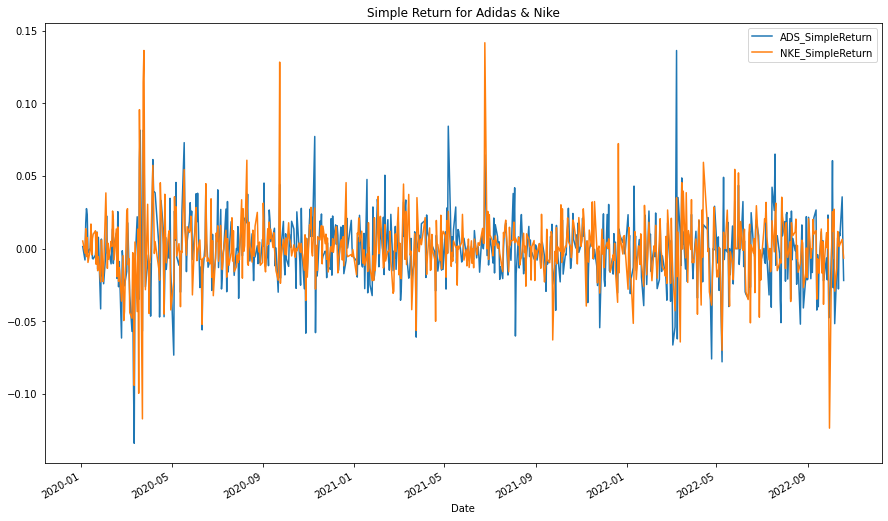

In [27]:
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

simple_return_ADS.plot(label = "ADS_SimpleReturn") # Plot the lsimple return
simple_return_NKE.plot(label = "NKE_SimpleReturn")

# adding title to the plot
plt.title('Simple Return for Adidas & Nike')
# adding Label to the x-axis
plt.xlabel('Date')
# adding legend to the curve
plt.legend()

Histogram

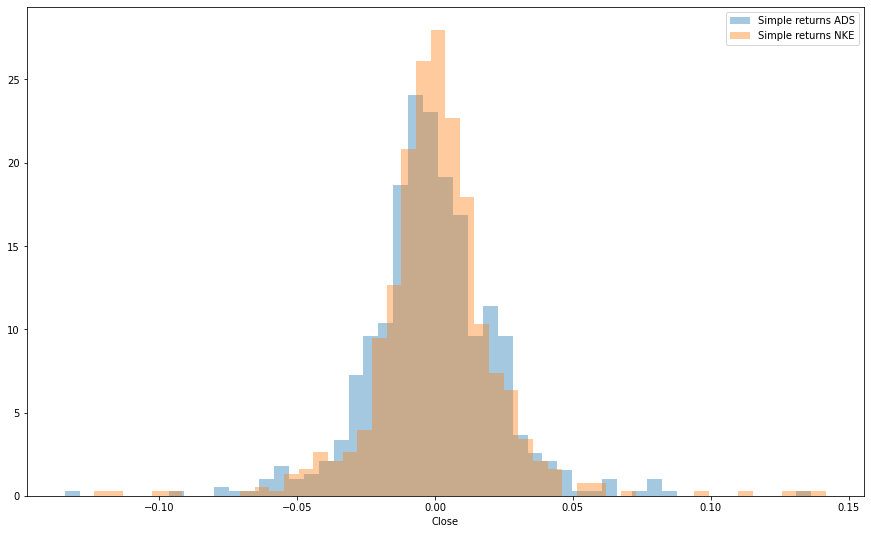

In [29]:
sns.distplot(simple_return_ADS, kde=False, norm_hist=True, label='Simple returns ADS')  
sns.distplot(simple_return_NKE, kde=False, norm_hist=True, label='Simple returns NKE')  
legend(loc='upper right');
plt.show()

3. Descriptive Statistics

In [31]:
simple_return_ADS.describe()

count    714.000000
mean      -0.001019
std        0.023463
min       -0.134064
25%       -0.013069
50%       -0.001505
75%        0.011318
max        0.136314
Name: Close, dtype: float64

In [32]:
simple_return_NKE.describe()

count    714.000000
mean       0.000260
std        0.022588
min       -0.123643
25%       -0.009697
50%        0.000000
75%        0.010443
max        0.141682
Name: Close, dtype: float64